# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [4]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [6]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [7]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [8]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [9]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

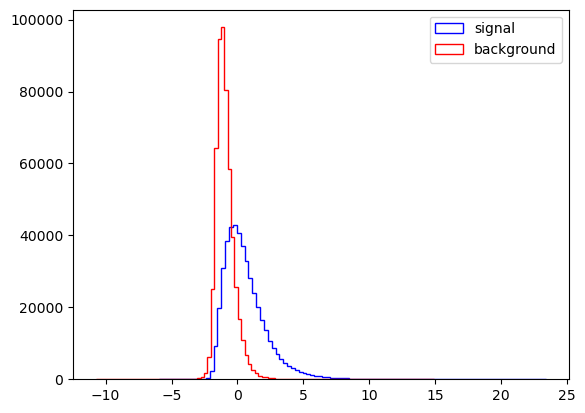

In [10]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

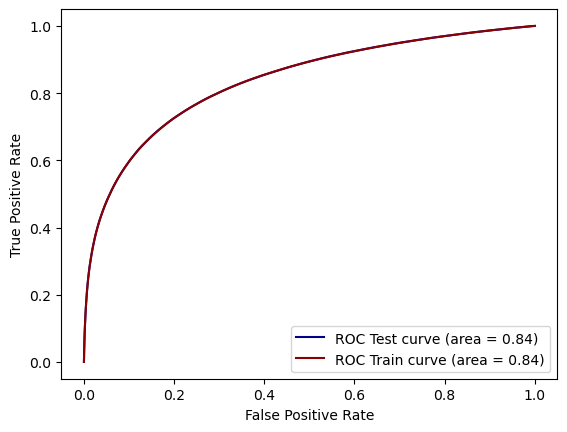

In [16]:
from sklearn.metrics import roc_curve, auc

#calculating roc
fpr_test, tpr_test, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
fpr_train, tpr_train, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))

#calculating auc
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

#plotting
plt.plot(fpr_test,tpr_test,color='darkblue',label='ROC Test curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train,tpr_train,color='darkred',label='ROC Train curve (area = %0.2f)' % roc_auc_train)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

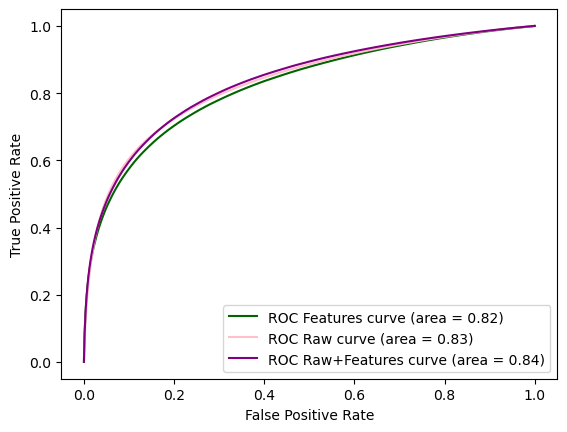

In [18]:
def train_and_graph(set_y,set_x):
    Fisher=DA.LinearDiscriminantAnalysis()
    Fisher.fit(set_x, set_y)
    fpr, tpr, _ = roc_curve(set_y, Fisher.decision_function(set_x))
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

#Raw columns
raw_y_train=Train_Sample["signal"]
raw_x_train=Train_Sample[VarNames[1:9]]

#Features column
feature_y_train=Train_Sample["signal"]
feature_x_train=Train_Sample[VarNames[9:]]

fpr_raw, tpr_raw, roc_auc_raw=train_and_graph(raw_y_train, raw_x_train) #raw
fpr_feature, tpr_feature, roc_auc_feature=train_and_graph(feature_y_train, feature_x_train) #feature
fpr, tpr, roc_auc=train_and_graph(y_Train, X_Train) #both

#Plotting
plt.plot(fpr_feature, tpr_feature, color='darkgreen',label='ROC Features curve (area = %0.2f)' % roc_auc_feature)
plt.plot(fpr_raw, tpr_raw, color='pink',label='ROC Raw curve (area = %0.2f)' % roc_auc_raw)
plt.plot(fpr,tpr,color='purple',label='ROC Raw+Features curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

fitting
done fitting
predicting
Done predicting.
Evaluating
Done evalutaing
fitting
done fitting
predicting
Done predicting.
Evaluating
Done evalutaing
fitting
done fitting
predicting
Done predicting.
Evaluating
Done evalutaing


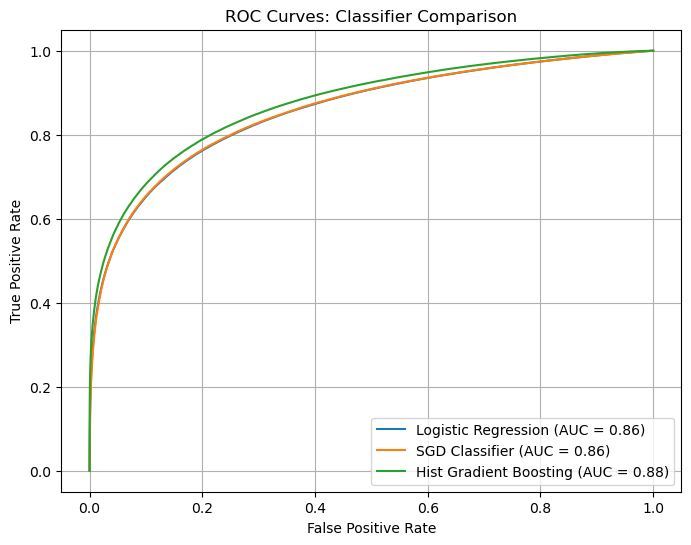

In [19]:
#Part A - comparing different models

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

def compare_classifier(classifier, x_train, y_train, x_test, y_test):
    try:
        #fitting different classifer + print statements to see progress
        print("fitting")
        classifier.fit(x_train, y_train)
        print("done fitting")

        #allow to use predict or decision func for different kinds of classifiers
        print("predicting")
        if hasattr(classifier, "predict_proba"):
            y_scores_test = classifier.predict_proba(x_test)[:, 1]
        elif hasattr(classifier, "decision_function"):
            y_scores_test = classifier.decision_function(x_test)
        else:
            raise AttributeError("Classifier lacks both predict_proba and decision_function.")
        print("Done predicting.")

        #Test performance
        print("Evaluating")
        fpr, tpr, _ = roc_curve(y_test, y_scores_test)
        roc_auc = auc(fpr, tpr)
        print("Done evalutaing")
        return fpr, tpr, roc_auc
        
    except Exception as e:
        print(f"Error with classifier {classifier.__class__.__name__}: {e}")
        return [0], [0], 0   

#setting up classifier
clf1=LogisticRegression()
clf2=SGDClassifier()
clf3=HistGradientBoostingClassifier()

#using classifiers
fpr1, tpr1, roc_auc1 = compare_classifier(clf1, X_Train, y_Train, X_Test, y_Test)
fpr2, tpr2, roc_auc2 = compare_classifier(clf2, X_Train, y_Train, X_Test, y_Test)
fpr3, tpr3, roc_auc3 = compare_classifier(clf3, X_Train, y_Train, X_Test, y_Test)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label='Logistic Regression (AUC = %.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='SGD Classifier (AUC = %.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Hist Gradient Boosting (AUC = %.2f)' % roc_auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Classifier Comparison')
plt.legend()
plt.grid()
plt.show()

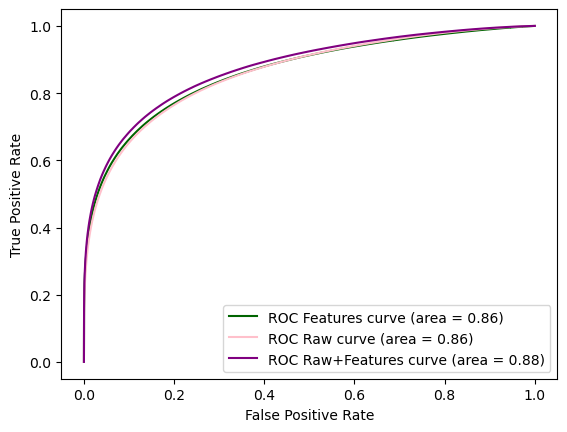

In [22]:
# PART B 

def HGB_graph(set_y,set_x):
    classifier=HistGradientBoostingClassifier()
    classifier.fit(set_x, set_y)
    fpr, tpr, _ = roc_curve(set_y, classifier.decision_function(set_x))
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

#Raw columns
raw_y_train=Train_Sample["signal"]
raw_x_train=Train_Sample[VarNames[1:9]]

#Features column
feature_y_train=Train_Sample["signal"]
feature_x_train=Train_Sample[VarNames[9:]]

fpr_raw, tpr_raw, roc_auc_raw=HGB_graph(raw_y_train, raw_x_train) #raw
fpr_feature, tpr_feature, roc_auc_feature=HGB_graph(feature_y_train, feature_x_train) #feature
fpr, tpr, roc_auc=HGB_graph(y_Train, X_Train) #both

#Plotting
plt.plot(fpr_feature, tpr_feature, color='darkgreen',label='ROC Features curve (area = %0.2f)' % roc_auc_feature)
plt.plot(fpr_raw, tpr_raw, color='pink',label='ROC Raw curve (area = %0.2f)' % roc_auc_raw)
plt.plot(fpr,tpr,color='purple',label='ROC Raw+Features curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [24]:
#PART C 

scenarios= {"1": (10,100), 
        "2": (100,1000),
        "3": (1000,10000),
        "4": (10000,100000)}

def plot_significance_w_classifier(classifier, x_train, y_train, x_test, y_test, scenarios, bins=100,log=False):

    FPR, TPR, _ = compare_classifier(classifier, x_train, y_train, x_test, y_test)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        #calculating maximal significance
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR
        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime + 1e-6)

        #Plotting
        plt.step(FPR, sig, label=name + " " + str((n_sig_expected, n_bkg_expected)))
        
        #find max significance for each scenario and store related info in max_sigs
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i])
        #store results in table
        table.append((name, n_sig_expected, n_bkg_expected, 
                      TPR[max_i], FPR[max_i],
                      n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], max_i))
    if log:
        plt.yscale("log")
        
    #Labelling
    plt.legend()
    plt.xlabel("Threshold x_c")
    plt.ylabel("Significance")
    plt.show()

    #Display info in table
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Scenario",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'Max sig','x_c',"bin i"])))
    return max_sigs

fitting
done fitting
predicting
Done predicting.
Evaluating
Done evalutaing


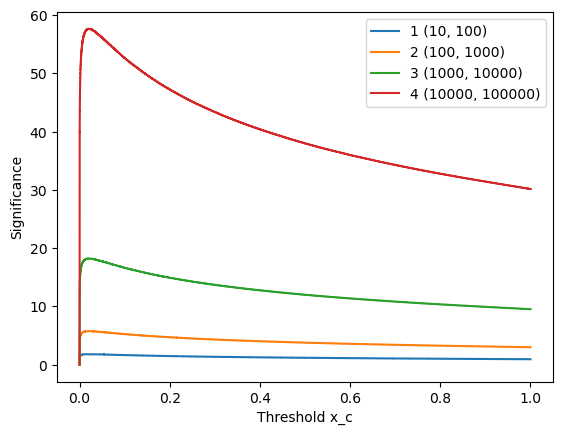

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',Max sig,x_c
1,10,100,0.468729,0.019261,4.68729,1.9261,1.82268,19658
2,100,1000,0.468729,0.019261,46.8729,19.261,5.76381,19658
3,1000,10000,0.468729,0.019261,468.729,192.61,18.2268,19658
4,10000,100000,0.468729,0.019261,4687.29,1926.1,57.6381,19658


In [26]:
_=plot_significance_w_classifier(clf3, X_Train, y_Train, X_Test, y_Test, scenarios)


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

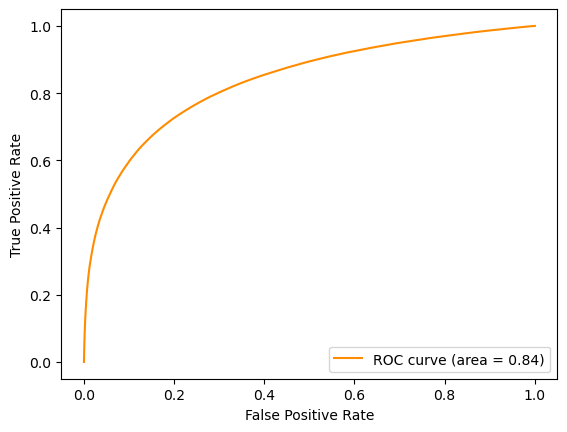

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [30]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
from IPython.display import display, HTML
import tabulate

def classifier_scores_table(classifier, x_train, y_train, x_test, y_test, scenarios, log=False):
    #using classifier
    classifier.fit(x_train, y_train)
    y_scores = classifier.predict_proba(x_test)[:, 1]
    y_pred = classifier.predict(x_test)

    # Requested metrics
    FPR, TPR, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(FPR, TPR)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    max_sigs = dict()
    table = list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        # Calculating maximal sig
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR
        sig = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime + 1e-6)

        max_i = np.argmax(sig)
        max_sigs[name] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i])
        
        #put results in table
        table.append((name, n_sig_expected, n_bkg_expected,
                      n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i],
                      TPR[max_i], FPR[max_i], roc_auc,
                      precision, recall, f1, accuracy))

    if log:
        plt.yscale("log")

    # Plotting the ROC curve
    plt.figure(figsize=(7, 5))
    plt.plot(FPR, TPR, color='aqua', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    # Show results table
    display(HTML(tabulate.tabulate(
        table,
        headers=["Scenario", "N sig", "N bkg", "N sig'", "N bkg'", "Max sig", 
                 "TPR", "FPR", "AUC", "Precision", "Recall", "F1", "Accuracy"], tablefmt='html')))

    return max_sigs


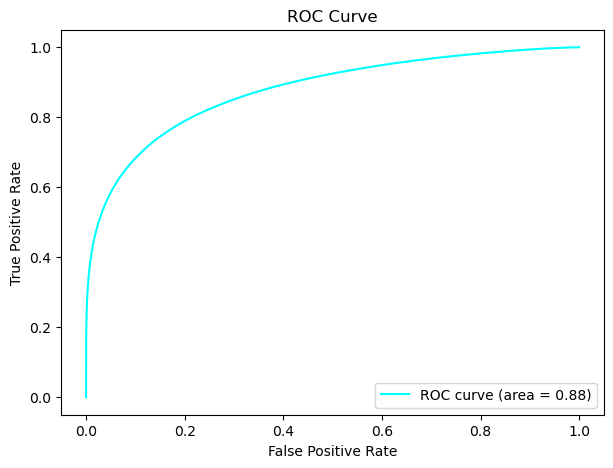

Scenario,N sig,N bkg,N sig',N bkg',Max sig,TPR,FPR,AUC,Precision,Recall,F1,Accuracy
1,10,100,4.78309,2.09832,1.82335,0.478309,0.0209832,0.87606,0.827409,0.71896,0.769381,0.802497
2,100,1000,47.8309,20.9832,5.76594,0.478309,0.0209832,0.87606,0.827409,0.71896,0.769381,0.802497
3,1000,10000,478.309,209.832,18.2335,0.478309,0.0209832,0.87606,0.827409,0.71896,0.769381,0.802497
4,10000,100000,4783.09,2098.32,57.6594,0.478309,0.0209832,0.87606,0.827409,0.71896,0.769381,0.802497


In [32]:
_=classifier_scores_table(clf3, X_Train, y_Train, X_Test, y_Test, scenarios)